# Importing Data
* Getting a csv file 

In [462]:
import pandas as pd
df_test=pd.read_csv("/content/FullDataSet.csv")
df_test.head()

,Unnamed: 0,Text,Target
0,0,Guilty.\non.\nall.\ncounts.\n\nToday was a his...,0
1,1,Proud of our students success!\nIn next few da...,0
2,2,"Creativity is inventing, experimenting, growin...",0
3,3,1st use and 2nd use B2C TV leads from the expe...,0
4,4,If you\xe2\x80\x99re determined to get into th...,0


In [463]:
df_test.drop(["Unnamed: 0"],axis=1,inplace=True)
df_test.head()

,Text,Target
0,Guilty.\non.\nall.\ncounts.\n\nToday was a his...,0
1,Proud of our students success!\nIn next few da...,0
2,"Creativity is inventing, experimenting, growin...",0
3,1st use and 2nd use B2C TV leads from the expe...,0
4,If you\xe2\x80\x99re determined to get into th...,0


Importing Necessary Libraries

In [464]:
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [465]:
data=df_test.to_numpy()

In [466]:
data[:2]

array([['Guilty.\\non.\\nall.\\ncounts.\\n\\nToday was a historic day in America\\xe2\\x80\\x94and the world. Justice was served because\\n\\nTomorrow we continue.\\n\\n\\xe2\\x9c\\x8a\\xf0\\x9f\\x8f\\xbb\\xe2\\x9c\\x8a\\xf0\\x9f\\x8f\\xbc\\xe2\\x9c\\x8a\\xf0\\x9f\\x8f\\xbd\\xe2\\x9c\\x8a\\xf0\\x9f\\x8f\\xbe\\xe2\\x9c\\x8a\\xf0\\x9f\\x8f\\xbf ',
        0],
       ['Proud of our students success!\\nIn next few days we will be posting stories of our students covering their individual journey, stay tuned! ',
        0]], dtype=object)

In [467]:
X=data[:,0]
y=data[:,1]
y=y.astype('int')

In [468]:
type(X)

numpy.ndarray

# NLP pipeline
* Tokenization - Breaking down of doc into sentences and sentences into words
* Stopword Removal - Removing insignificant words to bring down the vocabulary count
* Lemmatization/Stemming - Concentrating words of similar meaning to its root word


In [469]:
import nltk
nltk.download('stopwords')
tokenizer = RegexpTokenizer('[a-zA-Z@.]+')
sw = set(stopwords.words('english'))
#ps = PorterStemmer()
ps=WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [470]:
tokenizer.tokenize("What an amazing day! Let's go out for a walk")

['What', 'an', 'amazing', 'day', 'Let', 's', 'go', 'out', 'for', 'a', 'walk']

# Data Pre-Processing

In [471]:
def getCleanSent(data):
  data=data.lower()
  token=tokenizer.tokenize(data)
  clean_data_1=[w for w in token if w not in sw]   #Removing stop words(Removes stopwords from our t)
  clean_data_2=[ps.lemmatize(token) for token in clean_data_1] #Using stemming to condense tenses
  clean_data=' '.join(clean_data_2)
  return clean_data

In [472]:
def getCleanDoc(doc):
  li=[]
  for d in doc:
    li.append(getCleanSent(d))
  return li

In [473]:
nltk.download('wordnet')
cleaned_data=getCleanDoc(X)
len(cleaned_data[0])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


232

In [474]:
#cv=TfidfVectorizer()
cv=CountVectorizer(stop_words='english')
vocab=cv.fit_transform(cleaned_data)

In [475]:
vocab.shape

(614, 4460)

In [476]:
X=vocab.todense()
X=X.astype('int')
type(X)

numpy.matrix

In [477]:
models={"MultinomialNB":MultinomialNB(),
        "GaussianNB":GaussianNB(),
        "BernoulliNB":BernoulliNB()}
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Model Selection and Evaluation

We use Recall-score as a metric to judge our model
* Job detection has a lesser number of occurences as comapred to other posts due to which there is an imbalance in our dataset
* Accuracy won't be an ideal metric as it is bound to be high
* Recall score would help us in knowing how precisely our model is predicting a class

In [478]:
from sklearn.metrics import recall_score

In [479]:
def ModelExperimentAndEvaluation(models,X_train,X_test,y_train,y_test):
  model_scores={}
  np.random.seed(42)
  for name,model in models.items():
    model.fit(X_train,y_train)
    y_preds=model.predict(X_test)
    model_scores[name]=recall_score(y_test,y_preds)
  return model_scores
model_scores=ModelExperimentAndEvaluation(models=models,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
model_scores


{'BernoulliNB': 0.1111111111111111,
 'GaussianNB': 0.6111111111111112,
 'MultinomialNB': 0.7777777777777778}

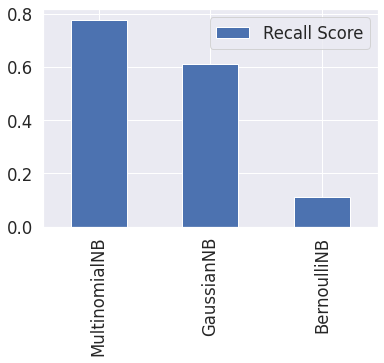

In [480]:
model_visual=pd.DataFrame(model_scores,index=["Recall Score"])
model_visual.T.plot.bar();

In [481]:
model=MultinomialNB()
model.fit(X_train,y_train)
val=recall_score(y_test,y_preds)
format_val = "{:.2f}".format(val)
print(format_val)

0.78


In [482]:
from sklearn.model_selection import cross_val_score
cv_acc = cross_val_score(model,X,y,cv=5,scoring="accuracy")
avg_acc=0
for item in cv_acc:
  avg_acc+=item
print(f"Average accuracy of the model is:{avg_acc/5}")
y_preds=model.predict(X_test)

Average accuracy of the model is:0.832267093162735


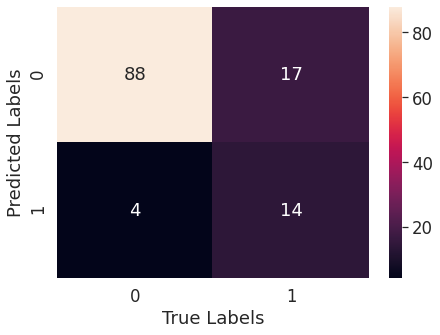

In [483]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm=confusion_matrix(y_test,y_preds)
sns.set(font_scale=1.5)
fig,ax=plt.subplots(figsize=(7,5))
ax=sns.heatmap(cm,annot=True,fmt='g')
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels");

In [484]:
print(classification_report(y_test,y_preds));

              precision    recall  f1-score   support

           0       0.96      0.84      0.89       105
           1       0.45      0.78      0.57        18

    accuracy                           0.83       123
   macro avg       0.70      0.81      0.73       123
weighted avg       0.88      0.83      0.85       123



# Custom Predictions

In [485]:
from sklearn.metrics import roc_curve,roc_auc_score
false_positive_rate, true_positive_rate, threshold1 = roc_curve(y_test, y_preds)
print('roc_auc_score for GaussianNB: ', roc_auc_score(y_test, y_preds))

roc_auc_score for GaussianNB:  0.807936507936508


In [486]:
new_text=["FROM YOUTUBE COMMENT SECTION\xf0\x9f\x92\xaf\n\nHOW MUCH DO YOU AGREE WITH IT? \xf0\x9f\x99\x82\n\nCHILDHOOD AT STAKE \xf0\x9f\x91\x80\n\nThis Seriousness Is Good ?",
"#MicrosoftAzure\nThank you\xf0\x9f\x91\x8d for this certification..",
"I'm delighted to share that I have been selected for the Intuit mentorship program- Intuit Nurture and Augment 2021.\n\nI am looking forward to augmenting my skill-set and growing to be a confident technologist in the future. ",
"I am #learning #python and you",
"Job applicants drop your cv in this link. We are looking out for candidates with finance background",
"The SAU community has a history of speaking out against racism and other social injustices. We remain committed to providing a safe place for our students to express themselves.\n\nOur greatest hope is that our University, our country and the entire world can strive to be better, not just today, but every day.\n\nIt is our collective goal that the entire SAU community, nation and world will learn from these incidents and ultimately our students, will continue to lead the way in bridging the chasms that exist. \xf0\x9f\x90\xa6\xf0\x9f\x92\x99\xe2\x9c\x8a\xf0\x9f\x8f\xbe",
"Let's commence the battle of chess, crushing each other's mind, to pronounce the CHECKMATE proudly!\n\n\n\n\n+44 20 3287 8700.",
"#PHARMA SALES\n#hiring #pharmaceutical #medical representative\n\nJOB LOCATION-: BIHAR (ANY AREA)",
"We are looking for interns for web development role",
"I'm hiring web development full time interns for a period of 3 months. If you know anyone dm!"]
def prepareText(text):
  d = getCleanDoc(text)
  return cv.transform(d).toarray()
message = prepareText(new_text)

In [487]:
model.predict(message)

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 1])

Follow Up:
* The model could be further improved by advanced NLP techniques like entity extraction
* Recall score and confusion matrix can be improved upon by taking in more job posts in particular so that our datatset gets balanced.